<a href="https://colab.research.google.com/github/BakMarino/Dados/blob/main/datascienceconectorchave.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

In [ ]:
#Lista de amigos
users = [
    { 'id': 0, 'name': 'Hero' },
    { 'id': 1, 'name': 'Dunn' },
    { 'id': 2, 'name': 'Sue' },
    { 'id': 3, 'name': 'Chi' },
    { 'id': 4, 'name': 'Thor' },
    { 'id': 5, 'name': 'Clive' },
    { 'id': 6, 'name': 'Hicks' },
    { 'id': 7, 'name': 'Devin' },
    { 'id': 8, 'name': 'Kate' },
    { 'id': 9, 'name': 'Klein' }
]

In [ ]:
#relação das amizades 'quem é amigo de quem'
friendships = [(0,1), (0,2), (1,2), (1,3), (2,3), (3,4),
               (4,5), (5,6), (5,7), (6,8), (7,8), (8,9)]

In [ ]:
for user in users:
  user['friends'] = []

for i, j in friendships:
  # nesse caso i é a posição na matriz que pode ser no caso de 0 a 9
  users[i]['friends'].append(users[j]) # adiciona i como amigo de j
  users[j]['friends'].append(users[i]) # adiciona j como amigo de i

In [ ]:
def number_of_friends(user):
  """quantos amigos o usuario tem?"""
  return len(user['friends']) # tamanho da lista de friends_id
total_connections = sum(number_of_friends(user) # o tamanho das lista do "quem é amigo de quem" logo 24 conexões
                            for user in users)

In [ ]:
from __future__ import division
num_users = len(users)
avg_connections = total_connections / num_users

In [ ]:
num_friends_by_id = [(user['id'], number_of_friends(user)) for user in users]
sorted_friends = sorted(num_friends_by_id, key=lambda item: item[1], reverse=True)
print(sorted_friends)

for user_id, num_friends in sorted_friends:
    print(f"User ID: {user_id}, Number of Friends: {num_friends}")

[(1, 3), (2, 3), (3, 3), (5, 3), (8, 3), (0, 2), (4, 2), (6, 2), (7, 2), (9, 1)]
User ID: 1, Number of Friends: 3
User ID: 2, Number of Friends: 3
User ID: 3, Number of Friends: 3
User ID: 5, Number of Friends: 3
User ID: 8, Number of Friends: 3
User ID: 0, Number of Friends: 2
User ID: 4, Number of Friends: 2
User ID: 6, Number of Friends: 2
User ID: 7, Number of Friends: 2
User ID: 9, Number of Friends: 1


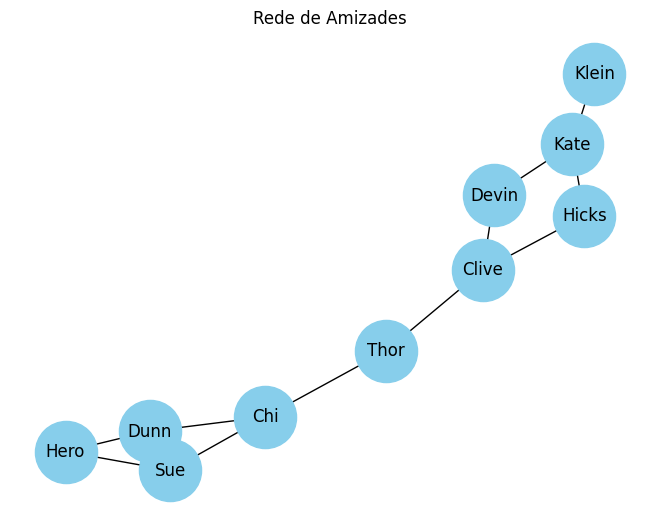

In [ ]:
grafo = nx.Graph()
grafo.add_node('Hero')
grafo.add_node('Dunn')
grafo.add_node('Sue')
grafo.add_node('Chi')
grafo.add_node('Thor')
grafo.add_node('Clive')
grafo.add_node('Hicks')
grafo.add_node('Devin')
grafo.add_node('Kate')
grafo.add_node('Klein')

grafo.add_edge('Hero', 'Dunn') #(0,	1)
grafo.add_edge('Hero', 'Sue') #(0,	2)
grafo.add_edge('Dunn', 'Sue') #(1,	2)
grafo.add_edge('Dunn', 'Chi')#(1,	3)
grafo.add_edge('Sue', 'Chi')#(2,	3)
grafo.add_edge('Chi', 'Thor')#(3,	4)
grafo.add_edge('Thor', 'Clive')#(4,	5)
grafo.add_edge('Clive', 'Hicks')#(5,	6)
grafo.add_edge('Clive', 'Devin')#(5,	7)
grafo.add_edge('Hicks', 'Kate')#(6,	8)
grafo.add_edge('Devin', 'Kate')#(7,	8)
grafo.add_edge('Kate', 'Klein')#(8,	9)

pos = nx.spring_layout(grafo)
nx.draw(grafo, pos, with_labels=True, node_color='skyblue', node_size=2000, font_size=12)
plt.title('Rede de Amizades')
plt.show()